# Preprocessing The Provided Data

#### Importing the required libraries for data preprocessing & visualization.

In [1]:
#Importing The Pandas Library!
import pandas as pd
#Importing The Numpy Library!
import numpy as np
#Importing The Matplotlib Library!
from matplotlib import pyplot as plt
#Importing DateTime Library For Parsing Str To DateTime!
from datetime import datetime

#### Let us begin by reading the provided data from CSV file(s).

In [2]:
#Creating Data Frame Of Train Data-Set
train_data = pd.read_csv('train.csv')
#Creating Data Frame Of Test Data-Set
test_data = pd.read_csv('test.csv')

In [3]:
#Printing The Shape Of Both The Data-Sets!
print('Training Data-Set :', train_data.shape)
print('Testing Data-Set :', test_data.shape)

Training Data-Set : (12980, 12)
Testing Data-Set : (4399, 11)


In [4]:
#Finding Out The Names Of Columns In Data-Sets!
print('Training Data-Set :', train_data.columns)
print('Testing Data-Set :', test_data.columns)

Training Data-Set : Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
Testing Data-Set : Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')


#### Clearly, 'count' is the target variable as it is not present in the test data-set. Now let's check for the null Values in both the data-sets and the data type of each column.

In [5]:
#Building The Null Matrix And Finding The Sum Column-Wise!
print(train_data.isnull().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [6]:
#Building The Null Matrix And Finding The Sum Column-Wise!
print(train_data.isnull().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


#### There are no null values in the entire data set, so there is no need to perform any action related to it. Moreover, the 'datetime' column is of object type, so we need to extract important feautures that affect the target variable. the feautures to be extracted from 'datetime' are 'hour', 'day' and 'month'.

In [7]:
#Adding The Additional Features After Extracting From 'datetime'!
train_data['hour'] = train_data.datetime.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').hour)
train_data['day'] = train_data.datetime.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').day)
train_data['month'] = train_data.datetime.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month)

In [8]:
#Performing The Same Operation On Test Data-Set!
test_data['hour'] = test_data.datetime.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').hour)
test_data['day'] = test_data.datetime.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').day)
test_data['month'] = test_data.datetime.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month)

In [9]:
#Now 'datetime' Column Is No Longer Needed, So We Will Drop The Same From Both Data-Sets!
train_data = train_data.drop('datetime', axis = 1)
test_data = test_data.drop('datetime', axis = 1)

# Univariate Analysis

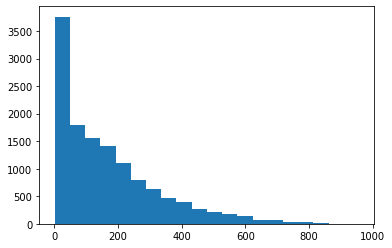

In [10]:
#Plotting The Output Variable For Determining The Distribution!
fig = plt.hist(train_data['count'], bins = 20)
plt.show()

The distribution is right skewed, so let us check if the logarithmic transformation will change the distributionog the output variable 'count'.

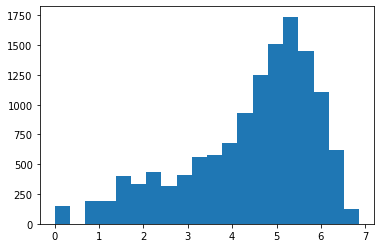

In [11]:
fig = plt.hist(np.log(train_data['count']), bins = 20)
plt.show()

In [12]:
#Applying The Transformation On The Actual Data!
train_data['count'] = np.log(train_data['count'])

# Bivariate Analysis

In [13]:
#We Need To Find Out The Correlation Between All The Independent Variables!
temp = train_data.corr()
c_names = temp.columns

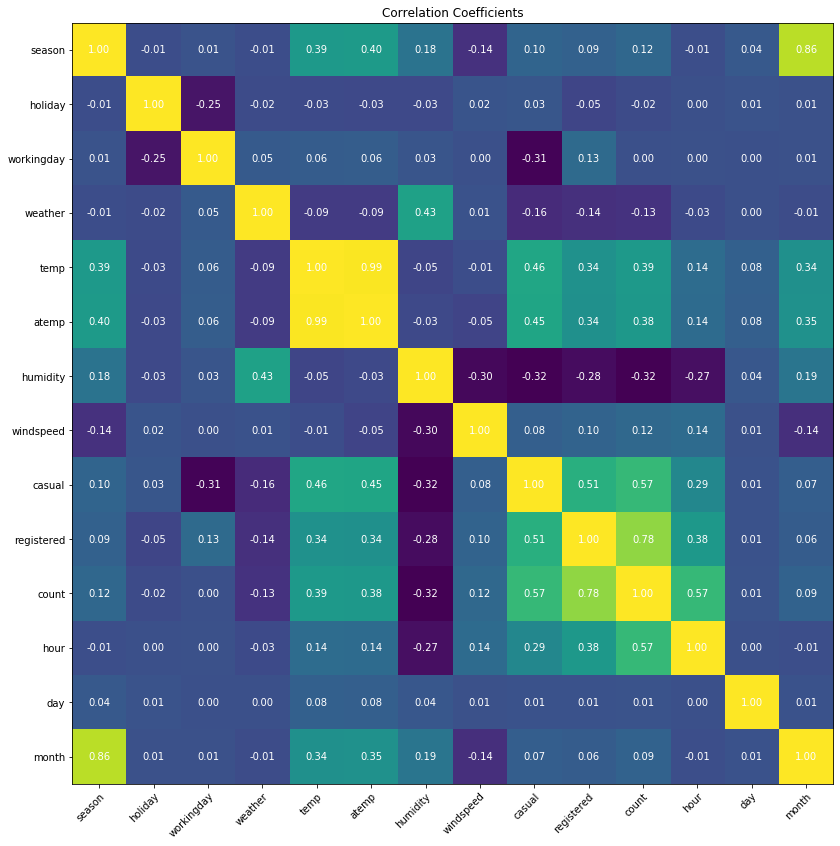

In [14]:
#Drawing The Heatmap For The Correlation Data!
fig, ax = plt.subplots(figsize = (14,14))
im = ax.imshow(temp)
ax.set_xticks(np.arange(len(c_names)))
ax.set_yticks(np.arange(len(c_names)))
ax.set_xticklabels(c_names)
ax.set_yticklabels(c_names)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(c_names)):
    for j in range(len(c_names)):
        text = ax.text(i, j, f'{temp[c_names[i]][c_names[j]]:.2f}', ha="center", va="center", color="w")
ax.set_title('Correlation Coefficients')
plt.show()

We observe that the correlation between the variables 'atemp' and 'temp' is significantly higher and both of them have nearly equal correlation with 'count' variable, so it would be better to drop one of the variable from the data-sets.

In [15]:
#Now 'atemp' Column Is No Longer Needed, So We Will Drop The Same From Both Data-Sets!
train_data = train_data.drop('atemp', axis = 1)
test_data = test_data.drop('atemp', axis = 1)

# Building The Model From Data-Set

In [16]:
#Importing The Required Modules For Model Building!
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

## The Linear Regression Model

In [17]:
#We Begin By Creating An Object For LinearRegression Class!
reg_model = LinearRegression()
#Fitting The Curve For Independent Variables And An Output Variable!
reg_model.fit(train_data.drop('count', axis = 1), train_data['count'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
#Once The Model Has Been Trained, We Will Obtain The Performance On Train Data!
predict_test = reg_model.predict(train_data.drop('count', axis = 1))

#Since The Output Is Predicted On Logarithmic Scale, We Need To Evaluate The Actual Values!
actual_count = np.exp(np.array(train_data['count']))
predict_count = np.exp(np.array(predict_test))

### Evaluation Metric RMSLE Definition

In [19]:
#Defining The Function For Calculating The Root Mean Squared Logarithmic Error For Performance Evaluation!
def RMSLE_calc(actual, predict):
    temp_0 = np.log(predict + 1) - np.log(actual + 1)
    temp_1 = np.power(temp_0, 2)
    perf = np.sqrt(np.mean(temp_1))
    return perf

#Finding The Error On The Predicted Values!
error = RMSLE_calc(actual_count, predict_count)
print('The RMSLE Is :', error)

The RMSLE Is : 0.7111498114507476


### We observe that the RMSLE is slightly higher than required level, so we will try to solve the problem using the decision tree model for regression.

In [20]:
#We Begin By Creating An Object For DecisonTreeRegressor Class!
dec_model = DecisionTreeRegressor()
#Training The Model On Train Data-Set!
dec_model.fit(train_data.drop('count', axis = 1), train_data['count'])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [21]:
#Once The Model Has Been Trained, We Will Obtain The Performance On Train Data!
predict_test = dec_model.predict(train_data.drop('count', axis = 1))

#Since The Output Is Predicted On Logarithmic Scale, We Need To Evaluate The Actual Values!
actual_count = np.exp(np.array(train_data['count']))
predict_count = np.exp(np.array(predict_test))

In [22]:
#Finding The Error On The Predicted Values!
error = RMSLE_calc(actual_count, predict_count)
print('The RMSLE Is :', error)

The RMSLE Is : 3.3237050801209583e-16


### The RMSLE score is pretty decent, so we will make the predictions on the test data-set for output variable 'count'.

In [23]:
#Predciting The Output Variable For Test Data-Set!
test_count = dec_model.predict(test_data)

#Converting The Values Back To Normal Values From Logarithmic Scale!
test_count = np.exp(np.array(test_count))

#Saving The Data Back To New CSV File!
new_values = pd.DataFrame()
new_values['count'] = test_count
new_values.to_csv('Test_Data_Predict.csv', header = True, index = False)